# Visualização de Dados [Vinho e Derivados]

O objetivo é visualizar:

- O montante de venda de exportação nos últimos 15 anos, separando a análise por países e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações.
- Gráficos atraentes e que passem a ideia central de projeção do futuro.

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
from exploratory_visualization import comercializacao, exportacao, importacao_vinhos, importacao_espumantes, producao_vinhos
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

/var/folders/qt/gmx8ztmn2gl7tvtxk3nkckh40000gn/T/ipykernel_29010/2276477601.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/qt/gmx8ztmn2gl7tvtxk3nkckh40000gn/T/ipykernel_29010/2276477601.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## Comercialização

In [7]:
df_comercio = comercializacao()
df_comercio = df_comercio.loc[df_comercio["ANO"] >= 2006].query('QTD_LITRO != 0.0')
df_comercio

,PRODUTO,ANO,QTD_LITRO
2196,VINHO DE MESA,2006,245625614.0
2197,Tinto,2006,209438207.0
2198,Rosado,2006,3071382.0
2199,Branco,2006,33116025.0
2200,VINHO FINO DE MESA,2006,22767358.0
...,...,...,...
3165,Vinagre simples,2021,5647166.0
3166,Vinho acetificado,2021,1448086.0
3168,Vinho composto,2021,227116.0
3169,Vinho licoroso,2021,376597.0


## Quantidade de produtos fabricados

In [8]:
print(df_comercio["PRODUTO"].unique(), "\n")

print("Quantidade de produtos fabricados:", len(df_comercio["PRODUTO"].unique()))

['VINHO DE MESA' '  Tinto' '  Rosado' '  Branco' 'VINHO  FINO DE MESA'
 'VINHO FRIZANTE' 'VINHO ESPECIAL' 'ESPUMANTES ' '  Espumante  Moscatel'
 '  Espumante' 'SUCO DE UVAS' 'SUCO DE UVAS CONCENTRADO'
 'OUTROS PRODUTOS COMERCIALIZADOS' '  Agrin (fermentado, acetico misto)'
 '  Bagaceira (graspa)' '  Bebida de uva' '  Brandy (conhaque)' '  Cooler'
 '  Coquetel com vinho' '  Destilado de vinho' '  Filtrado doce'
 '  Jeropiga' '  Mistelas' '  Mosto de uva' '  Nectar de uva'
 '  Outros produtos' '  Polpa de uva' '  Preparado líquido para refresco'
 '  Sangria' '  Vinagre balsamico' '  Vinagre duplo' '  Vinagre simples'
 '  Vinho acetificado' '  Vinho base para espumantes' '  Vinho composto'
 '  Vinho licoroso' '  Borra seca' '  Base champenoise champanha'
 '  Base charmat champanha' '  Base espumante moscatel' '  Borra líquida'
 'Aguardente de vinho 50°gl' '  Alcool vinico'
 '  Outros vinhos (sem informação detalhada)' 'Refrigerante +50% suco'
 '  Vinho leve' '  Vinho gaseificado' 'VINHO O

In [9]:
# Ignorando sessão de tipo de produto, para contagem limpa de produtos fabricados
lista = ['VINHO DE MESA', '  Tinto', '  Rosado', '  Branco', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ESPECIAL', 'ESPUMANTES', '  Espumante  Moscatel', '  Espumante', 'SUCO DE UVAS', 'SUCO DE UVAS CONCENTRADO', 'OUTROS PRODUTOS COMERCIALIZADOS', '  Agrin (fermentado, acetico misto)', '  Bagaceira (graspa)', '  Bebida de uva', '  Brandy (conhaque)', '  Cooler', '  Coquetel com vinho', '  Destilado de vinho', '  Filtrado doce', '  Jeropiga', '  Mistelas', '  Mosto de uva', '  Nectar de uva', '  Outros produtos', '  Polpa de uva', '  Preparado líquido para refresco', '  Sangria', '  Vinagre balsamico', '  Vinagre duplo', '  Vinagre simples', '  Vinho acetificado', '  Vinho base para espumantes', '  Vinho composto', '  Vinho licoroso', '  Borra seca', '  Base champenoise champanha', '  Base charmat champanha', '  Base espumante moscatel', '  Borra líquida', 'Aguardente de vinho 50°gl', '  Alcool vinico', '  Outros vinhos (sem informação detalhada)', 'Refrigerante +50% suco', '  Vinho leve', '  Vinho gaseificado', 'VINHO ORGÂNICO', '  Espumante Orgânico', '   Suco Natural Integral', '   Suco Reprocessado/reconstituido', '   Suco Orgânico', '   Outros sucos de uvas', '  Mosto sulfitado']

contagem = 0

for elemento in lista:
    if not elemento.isupper():
        contagem += 1
    else:
        contagem = contagem

print(contagem)

45


## Media de Litros

In [10]:
valor_m3 = df_comercio["QTD_LITRO"].mean()
equivalente_litros = valor_m3 * 1000

print(round(equivalente_litros, 2))


15627926397.18


## Anos em destaque em comercialização por produto.

In [11]:
df_comercio_grouped = df_comercio.groupby('ANO').agg(QTD_PRODUTO_ANO=('PRODUTO', 'count'), MEDIA_LITROS=('QTD_LITRO', 'mean')).reset_index()
df_comercio_grouped

,ANO,QTD_PRODUTO_ANO,MEDIA_LITROS
0,2006,41,1.594076e+07
1,2007,40,1.540531e+07
2,2008,42,1.383205e+07
3,2009,40,1.698876e+07
4,2010,44,1.462061e+07
5,2011,44,1.528532e+07
6,2012,44,1.462658e+07
7,2013,44,1.638221e+07
8,2014,43,1.598253e+07
9,2015,43,1.656673e+07


## Media de QTD de produtos por ano

In [12]:
df_comercio_grouped["QTD_PRODUTO_ANO"].mean()

44.375

## Representação em gráfico

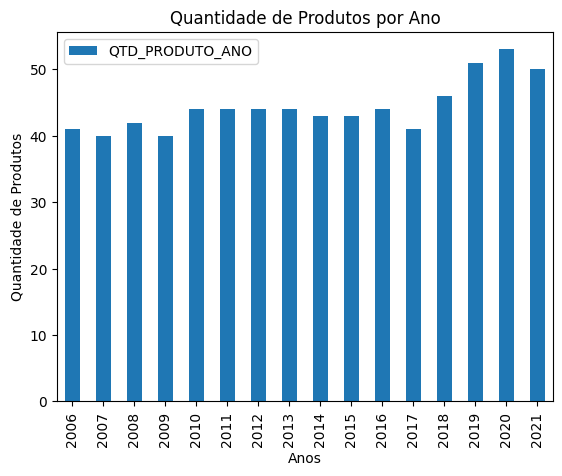

In [13]:
df_comercio_grouped.plot(x='ANO', y='QTD_PRODUTO_ANO', kind='bar')

plt.title('Quantidade de Produtos por Ano')
plt.xlabel('Anos')
plt.ylabel('Quantidade de Produtos')

plt.show()

# Países que mais realizam compras (exportaçao) e quantidade de receita 

In [14]:
df_exportacao = exportacao()
df_exportacao = df_exportacao.loc[df_exportacao["ANO"] >= 2006]
df_exportacao

,País,ANO,QTD_LITRO,VALOR_US
4464,Afeganistão,2006,0,0
4465,África do Sul,2006,0,0
4466,"Alemanha, República Democrática",2006,38302,89231
4467,Angola,2006,3766,18293
4468,Anguilla,2006,0,0
...,...,...,...,...
6443,Tuvalu,2021,0,0
6444,Uruguai,2021,136774,149842
6445,Vanuatu,2021,0,0
6446,Venezuela,2021,26415,35944


## Media de quantidade de receita nos ultimos 15 anos e por ano

In [15]:
df_media_expo = df_exportacao.groupby('ANO').agg(MEDIA_RECEITA_ANO=('VALOR_US', 'mean')).reset_index()
df_media_expo

,ANO,MEDIA_RECEITA_ANO
0,2006,21436.346774
1,2007,29727.016129
2,2008,57404.032258
3,2009,72104.741935
4,2010,20929.862903
5,2011,29154.193548
6,2012,44526.556452
7,2013,183426.169355
8,2014,60264.475806
9,2015,22331.935484


In [16]:
print(round(df_media_expo["MEDIA_RECEITA_ANO"].mean(), 2))

54457.3


In [17]:
df_exportacao.groupby('ANO').agg(VALOR_BRUTO=('VALOR_US', 'count'), MEDIA_RECEITA_ANO=('VALOR_US', 'mean')).reset_index()


,ANO,VALOR_BRUTO,MEDIA_RECEITA_ANO
0,2006,124,21436.346774
1,2007,124,29727.016129
2,2008,124,57404.032258
3,2009,124,72104.741935
4,2010,124,20929.862903
5,2011,124,29154.193548
6,2012,124,44526.556452
7,2013,124,183426.169355
8,2014,124,60264.475806
9,2015,124,22331.935484


## Verificando o mais que mais exportou vinho

In [18]:
contagem = df_exportacao['País'].value_counts()

maior_ocorrencia = contagem.idxmax()

print(maior_ocorrencia)

Afeganistão


In [19]:
maior_ocorrencia = df_exportacao.groupby('ANO')['País'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Renomear as colunas
maior_ocorrencia.columns = ['ANO', 'MAIOR_OCORRENCIA']

# Exibir o DataFrame resultante
print(maior_ocorrencia)

     ANO MAIOR_OCORRENCIA
0   2006      Afeganistão
1   2007      Afeganistão
2   2008      Afeganistão
3   2009      Afeganistão
4   2010      Afeganistão
5   2011      Afeganistão
6   2012      Afeganistão
7   2013      Afeganistão
8   2014      Afeganistão
9   2015      Afeganistão
10  2016      Afeganistão
11  2017      Afeganistão
12  2018      Afeganistão
13  2019      Afeganistão
14  2020      Afeganistão
15  2021      Afeganistão


# Entendendo qual produto foi mais produzido por litro de acordo com o ano

In [20]:
df_produto = producao_vinhos()
df_produto = df_produto.loc[df_produto["ANO"] >= 2006]
df_produto

,PRODUTO,ANO,QTD_LITRO
1836,VINHO DE MESA,2006,185100887
1837,Tinto,2006,149552555
1838,Branco,2006,31738390
1839,Rosado,2006,3809942
1840,VINHO FINO DE MESA (VINÍFERA),2006,32168977
...,...,...,...
2647,Espumante orgânico,2021,2412
2648,Destilado alcoólico simples de bagaceira,2021,3000
2649,Vinho acidificado,2021,0
2650,Mosto parcialmente fermentado,2021,543510


In [24]:
idx_max_qtd_litro = df_produto.groupby('ANO')['QTD_LITRO'].idxmax()

df_produto_mais_produzido = df_produto.loc[idx_max_qtd_litro, ['ANO', 'PRODUTO', 'QTD_LITRO']]

print(df_produto_mais_produzido)

       ANO        PRODUTO  QTD_LITRO
1836  2006  VINHO DE MESA  185100887
1887  2007  VINHO DE MESA  275287908
1938  2008  VINHO DE MESA  287506811
1989  2009  VINHO DE MESA  205418206
2040  2010  VINHO DE MESA  195267980
2091  2011  VINHO DE MESA  257840749
2142  2012  VINHO DE MESA  212777037
2193  2013  VINHO DE MESA  196904222
2244  2014  VINHO DE MESA  196173123
2295  2015  VINHO DE MESA  210308560
2346  2016  VINHO DE MESA   86319015
2397  2017  VINHO DE MESA  255015187
2448  2018  VINHO DE MESA  218375636
2499  2019  VINHO DE MESA  144629737
2550  2020  VINHO DE MESA  124200414
2601  2021  VINHO DE MESA  173899995


<Axes: xlabel='ANO'>

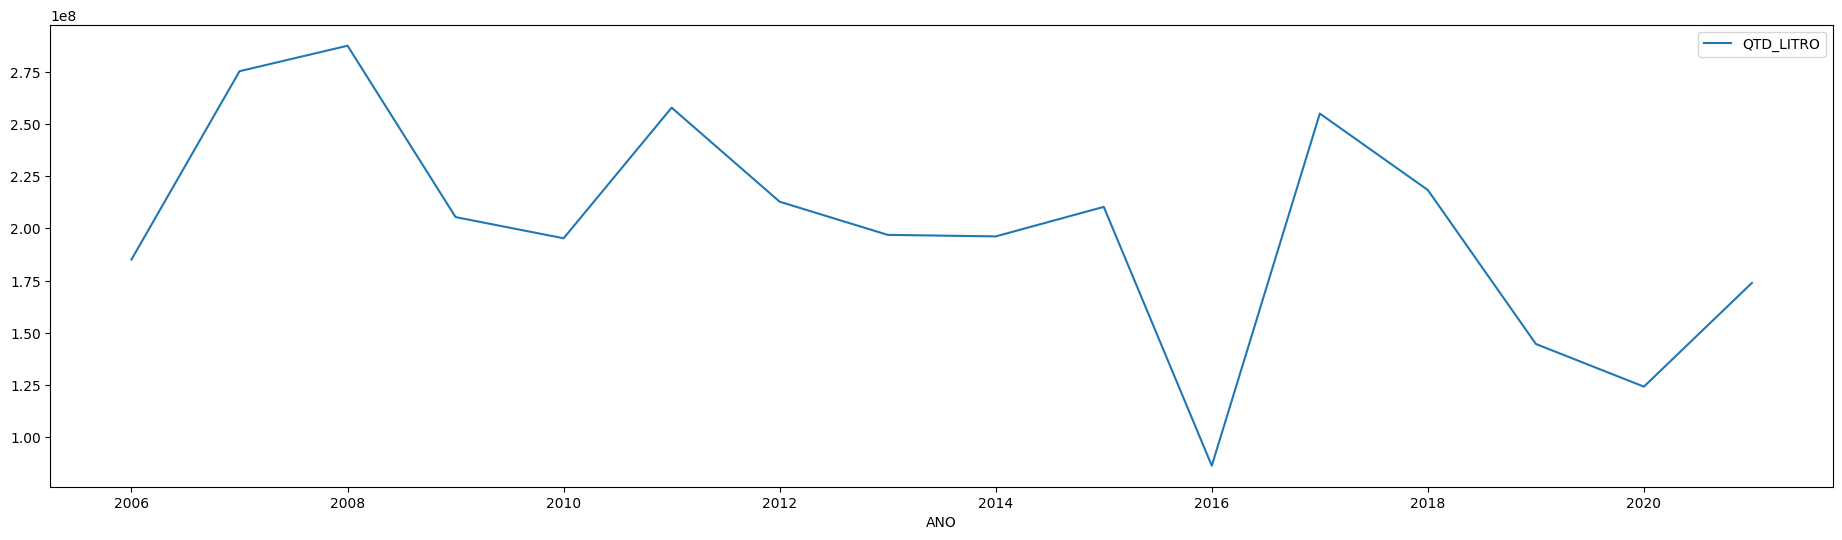

In [26]:
df_produto_mais_produzido.plot(x="ANO", y="QTD_LITRO", figsize=(23,6))

# Criando site com gráficos e pitch para acionistas investir na vinicola

In [21]:
# Criar gráfico de barras com Plotly Express
comercio = px.bar(df_comercio_grouped, x='ANO', y='QTD_PRODUTO_ANO')

# Inicializar a aplicação Dash
app = dash.Dash(__name__)

colors = {
    'background': '#000000',
    'text': '#FFFFFF'
}

# Definir o layout da página
app.layout = html.Div([
    # Título da página
    html.H1('Tech Challenge', style={'textAlign': 'center', 'color': '#16BA00'}),
    html.H2('Vitivinicultura, Embrapa Uva e Vinho', style={'textAlign': 'center', 'color': '#DCEDFF'}),
    # html.H3('Autores: Anna Karoliny e Victor Hugo', style={'color': '#DCEDFF'}),
    # Elemento Markdown
    dcc.Markdown('''

    Uma empresa desde 1970, que entrega qualidade no produto para clientes no mundo todo, sendo presente em 65 países.
    Invista agora no nosso negócio. Ainda tem dúvidas? Em 5 minutos com as informações abaixo e necessárias, vai te fazer pensar em fazer parte o quanto antes.

    '''),

    html.H2('Segurança nas Ações', style={'color': '#16BA00'}),
    dcc.Markdown('''

    **Nos ultimos 15 anos, mesmo em crises, sempre nos mantivemos e continuamos referência no mercado de vinhos e espumantes. 
    Se busca sofisticação, tempo de mercado, uma empresa presente nos principais países, e com entrega de qualidade, você está no lugar certo** 
    '''),

    html.H2('Tomada de Decições com Análise de Dados', style={'color': '#16BA00'}),
    dcc.Markdown('''

    **Um dos maiores motivos para investir conosco é que temos a tomada de decisão a partir do dados que nós obtemos. 
    É com toda a garantia que nossa empresa afirma, o investimento conosco é a certeza que só temos crescimento e retorno financeiro.**

    Saiba mais abaixo com nossas análises autorais.
    '''),

    html.H2('Comércio', style={'color': '#16BA00'}),
    html.H3('Temos constância e somos líderes em comercializar nossos produtos', style={'color': '#DCEDFF'}),

    dcc.Markdown('''
    
    Nos ultimos anos, continuamos comercializando todos os nossos produtos, entre eles vinhos, espumantes, sucos e entre outros, totalizando em 45 produtos.
    Podemos concluir com nossas análises, que 99% de todos os produtos estão sendo comercializados, desde 2006.
    '''),
    
    # Gráfico de barras
    dcc.Graph(figure=comercio)

])

# Executar a aplicação
if __name__ == '__main__':
    app.run_server(debug=True)
